In [72]:
import pandas as pd # import all relevant packages
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import requests

In [73]:
wall_st = pd.read_csv('wallstreetbets.csv') # import processed data
gambling = pd.read_csv('gambling.csv')

In [74]:
gambling = gambling[['body']] # extracting correct columns
wall_st = wall_st[['body']]

In [75]:
gambling['subreddit'] = 'gambling' # adding target variable
wall_st['subreddit'] = 'wall_st'

In [76]:
data = pd.concat([gambling, wall_st], axis = 0) # concat DataFrame

In [77]:
data['subreddit'] = data['subreddit'].map({'wall_st': 0, 'gambling' : 1}) # converting target variable to binary outcome

In [78]:
data.rename(columns = {'body' : 'text', 'subreddit' : 'gambling'}, inplace = True) # renameing columns

In [79]:
params = {
    'subreddit': 'wallstreetbets',
    'after' : '7d',
    'aggs' : 'created_utc',
    'frequency' : 'hour',
    'size' : 0,
    'size': 200
    }

url = 'https://api.pushshift.io/reddit/search/comment'
res = requests.get(url, params)

In [80]:
wallst = pd.DataFrame(res.json()['aggs']['created_utc'])

In [81]:
wallst['key'] = pd.to_datetime(wallst['key'], unit = 's')

In [82]:
wallst['gambling'] = 'Not Gambling'

In [83]:
params = {
    'subreddit': 'gambling',
    'after' : '7d',
    'aggs' : 'created_utc',
    'frequency' : 'hour',
    'size' : 0,
    'size': 200
    }

url = 'https://api.pushshift.io/reddit/search/comment'
res = requests.get(url, params)

In [84]:
gambling = pd.DataFrame(res.json()['aggs']['created_utc'])

In [85]:
gambling['key'] = pd.to_datetime(wallst['key'], unit = 's')

In [86]:
gambling['gambling'] = 'Yes Gambling'

In [87]:
agg.head()

,num_comments,date,gambling
0,1029,2020-01-23 14:00:00,Not Gambling
1,1484,2020-01-23 15:00:00,Not Gambling
2,1458,2020-01-23 16:00:00,Not Gambling
3,1388,2020-01-23 17:00:00,Not Gambling
4,1457,2020-01-23 18:00:00,Not Gambling


In [88]:
agg = pd.concat([wallst, gambling], axis = 0)
agg.rename(columns = {'doc_count' : 'num_comments', 'key': 'date', 'gambling' : 'Is This Gambling?'}, inplace = True)

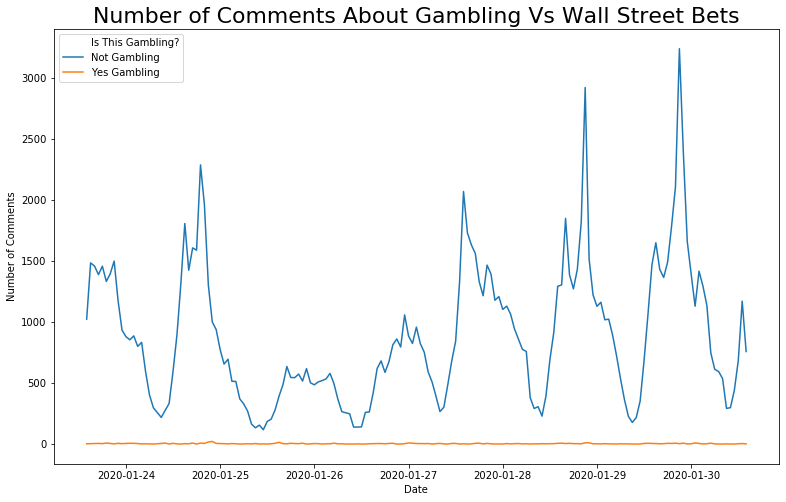

In [96]:
register_matplotlib_converters()
plt.subplots(figsize=(13,8))
sns.lineplot(x = 'date', y = 'num_comments', data = agg, hue = 'Is This Gambling?')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Number of Comments About Gambling Vs Wall Street Bets', fontsize=22);